In [59]:
import random
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

In [60]:
# Feature sampling
def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent * (df.shape[1] - 1)))
    return df[cols + [df.columns[-1]]]

# Row sampling
def sample_rows(df):
    return df.sample(frac=1, replace=True).reset_index(drop=True)

In [61]:
class RandomForestClassifierSimple:
    def __init__(self, n_estimators=30, max_features=0.8, max_depth=None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.models = [] 

    def fit(self, df):
        self.models = []

        for _ in range(self.n_estimators):
            sampled_df = sample_rows(df)
            feature_df = sample_features(sampled_df, self.max_features)

            X = feature_df.iloc[:, :-1]
            y = feature_df.iloc[:, -1]

            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            tree.fit(X, y)

            features_used = X.columns.tolist()
            self.models.append((tree, features_used))

    def predict(self, X):
        tree_preds = []

        for tree, features in self.models:
            preds = tree.predict(X[features])
            tree_preds.append(preds)

        tree_preds = np.array(tree_preds)
        final_preds = []

        for i in range(X.shape[0]):
            counts = np.bincount(tree_preds[:, i])
            final_preds.append(np.argmax(counts))

        return np.array(final_preds)

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

In [70]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

In [63]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
df = pd.concat([X, y], axis=1)


In [64]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [65]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

In [66]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
acc_tree = r2_score(y_test, y_pred_tree)

In [67]:
rf = RandomForestClassifierSimple(n_estimators=10, max_features=0.6)
rf.fit(train_df)
y_pred_rf = rf.predict(X_test)
acc_rf = r2_score(y_test, y_pred_rf)

In [72]:
sklearnRF = RandomForestClassifier(n_estimators=10,max_features=0.6)
sklearnRF.fit(X_train,y_train)
y_pred_sklearnRF = sklearnRF.predict(X_test)
acc_sklearnRF = r2_score(y_test, y_pred_sklearnRF)

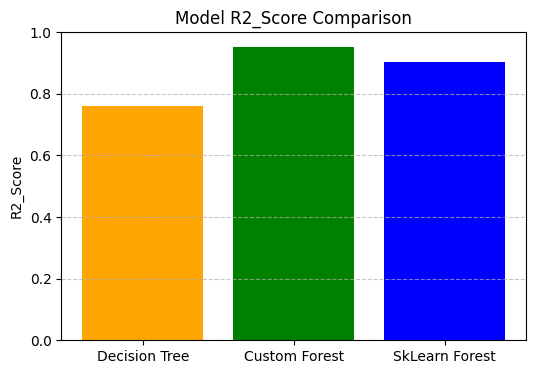

In [76]:
plt.figure(figsize=(6, 4))
plt.bar(['Decision Tree', 'Custom Forest',"SkLearn Forest"], [acc_tree, acc_rf, acc_sklearnRF], color=['orange', 'green','blue'])
plt.title('Model R2_Score Comparison')
plt.ylabel('R2_Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()